# Angiografia a fluorescenza pre impianto per valutare la qualità del graft nel trapianto renale

___

In [13]:
import sklearn as sk
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
df = pd.read_csv("C:/Users/giacomo.gaglione/Desktop/BRUS/sample_parsed.csv"
                      , sep=';'
                      , encoding='utf-8'
                      , decimal =','
                      , error_bad_lines=False)

In [16]:
df

,out,pz,indice,m,karpinski,KDPI_perc,KDRI,eta_don,altezza_don,peso_don,...,Diabete Mellito,Trasfusioni Pre_TX,sim_prec TX extra_renale,Morte_Anossia,MancCorr HLA,MancCorr HLA-DR,Ischemia Fredda_ore,Perfuzione,ATG,dcd
0,no trap,d'angelo,4.72,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dgf,raaka,5.66,NaN,5.0,100.0,2.57,75.0,173.0,74.0,...,no,no,no,no,6.0,2.0,20.0,si,si,si
2,dgf,khan,6.19,NaN,NaN,23.0,0.77,38.0,195.0,106.0,...,no,si,no,no,4.0,1.0,24.0,si,si,si
3,dgf,aiani,7.36,NaN,5.0,93.0,1.70,71.0,180.0,65.0,...,no,si,no,no,4.0,1.0,13.2,no,no,no
4,dgf,lucchini,7.79,NaN,NaN,83.0,1.43,65.0,180.0,65.0,...,no,si,no,no,2.0,1.0,17.0,no,no,no
5,egf,d'angelo,8.02,0.77,2.0,93.0,1.70,71.0,180.0,65.0,...,no,si,no,no,5.0,1.0,19.2,no,no,no
6,egf,ciullo,8.32,1.06,NaN,20.0,0.75,42.0,180.0,80.0,...,si,si,no,no,6.0,2.0,10.0,no,no,no
7,egf,colombo,9.10,1.25,5.0,94.0,1.77,64.0,170.0,100.0,...,no,si,no,no,2.0,1.0,13.5,no,si,no
8,egf,pisciotta,9.88,1.06,NaN,77.0,1.31,59.0,180.0,88.0,...,no,si,si,no,6.0,2.0,13.0,no,no,no
9,egf,bianchi,12.50,1.46,NaN,72.0,1.23,55.0,155.0,81.0,...,no,no,no,no,3.0,1.0,9.5,no,no,no


In [17]:
df1 = df.drop(['pz'], axis = 1)
df1

,out,indice,m,karpinski,KDPI_perc,KDRI,eta_don,altezza_don,peso_don,eta_ric,...,Diabete Mellito,Trasfusioni Pre_TX,sim_prec TX extra_renale,Morte_Anossia,MancCorr HLA,MancCorr HLA-DR,Ischemia Fredda_ore,Perfuzione,ATG,dcd
0,no trap,4.72,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dgf,5.66,NaN,5.0,100.0,2.57,75.0,173.0,74.0,60.0,...,no,no,no,no,6.0,2.0,20.0,si,si,si
2,dgf,6.19,NaN,NaN,23.0,0.77,38.0,195.0,106.0,48.0,...,no,si,no,no,4.0,1.0,24.0,si,si,si
3,dgf,7.36,NaN,5.0,93.0,1.70,71.0,180.0,65.0,68.0,...,no,si,no,no,4.0,1.0,13.2,no,no,no
4,dgf,7.79,NaN,NaN,83.0,1.43,65.0,180.0,65.0,54.0,...,no,si,no,no,2.0,1.0,17.0,no,no,no
5,egf,8.02,0.77,2.0,93.0,1.70,71.0,180.0,65.0,70.0,...,no,si,no,no,5.0,1.0,19.2,no,no,no
6,egf,8.32,1.06,NaN,20.0,0.75,42.0,180.0,80.0,62.0,...,si,si,no,no,6.0,2.0,10.0,no,no,no
7,egf,9.10,1.25,5.0,94.0,1.77,64.0,170.0,100.0,61.0,...,no,si,no,no,2.0,1.0,13.5,no,si,no
8,egf,9.88,1.06,NaN,77.0,1.31,59.0,180.0,88.0,34.0,...,no,si,si,no,6.0,2.0,13.0,no,no,no
9,egf,12.50,1.46,NaN,72.0,1.23,55.0,155.0,81.0,44.0,...,no,no,no,no,3.0,1.0,9.5,no,no,no


## Statistica Descrittiva

### Dataset iniziale (No trapianto + EGF + DGF)


___



In [18]:
df.describe()

,indice,m,karpinski,KDPI_perc,KDRI,eta_don,altezza_don,peso_don,eta_ric,crea sierica_don,PiccoPRA,Dialisi_Anni,BMI,Peso_kg,MancCorr HLA,MancCorr HLA-DR,Ischemia Fredda_ore
count,14.000000,9.000000,7.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,10.733571,1.565556,4.285714,68.230769,1.381538,58.230769,175.615385,80.076923,55.000000,0.847692,0.769231,3.692308,26.589231,76.076923,4.384615,1.461538,14.592308
std,5.105771,0.645854,1.704336,32.565713,0.539241,15.023059,9.570253,14.262197,11.937336,0.458224,2.773501,1.797434,4.149890,15.876931,1.445595,0.518875,4.614373
min,4.720000,0.770000,2.000000,2.000000,0.570000,25.000000,155.000000,65.000000,34.000000,0.450000,0.000000,1.000000,20.800000,53.000000,2.000000,1.000000,9.500000
25%,7.467500,1.060000,3.000000,63.000000,1.130000,55.000000,170.000000,70.000000,48.000000,0.570000,0.000000,3.000000,23.010000,66.500000,4.000000,1.000000,10.500000
50%,8.710000,1.350000,5.000000,77.000000,1.310000,62.000000,180.000000,75.000000,60.000000,0.790000,0.000000,4.000000,27.400000,78.500000,4.000000,1.000000,13.200000
75%,13.355000,2.260000,5.000000,93.000000,1.700000,71.000000,180.000000,88.000000,62.000000,0.930000,0.000000,5.000000,29.550000,82.000000,6.000000,2.000000,18.000000
max,19.940000,2.550000,7.000000,100.000000,2.570000,75.000000,195.000000,106.000000,70.000000,2.200000,10.000000,7.000000,33.600000,115.000000,6.000000,2.000000,24.000000


### Early Graft Function

___

In [19]:
egf = df[df["out"]=="egf"]
egf.describe()

,indice,m,karpinski,KDPI_perc,KDRI,eta_don,altezza_don,peso_don,eta_ric,crea sierica_don,PiccoPRA,Dialisi_Anni,BMI,Peso_kg,MancCorr HLA,MancCorr HLA-DR,Ischemia Fredda_ore
count,9.000000,9.000000,4.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,13.172222,1.565556,3.250000,65.333333,1.276667,56.444444,172.777778,81.222222,53.888889,0.863333,1.111111,3.888889,26.666667,76.722222,4.555556,1.555556,12.833333
std,4.779890,0.645854,1.258306,33.098338,0.433042,14.917365,8.700255,12.577537,13.485589,0.550000,3.333333,1.900292,4.314221,18.105785,1.424001,0.527046,3.573863
min,8.020000,0.770000,2.000000,2.000000,0.570000,25.000000,155.000000,65.000000,34.000000,0.450000,0.000000,1.000000,20.800000,53.000000,2.000000,1.000000,9.500000
25%,9.100000,1.060000,2.750000,63.000000,1.130000,55.000000,170.000000,72.000000,44.000000,0.570000,0.000000,3.000000,23.500000,67.000000,4.000000,1.000000,10.000000
50%,12.500000,1.350000,3.000000,72.000000,1.230000,59.000000,175.000000,80.000000,61.000000,0.640000,0.000000,4.000000,27.400000,80.000000,5.000000,2.000000,12.000000
75%,18.120000,2.260000,3.500000,93.000000,1.700000,64.000000,180.000000,88.000000,62.000000,0.930000,0.000000,5.000000,28.000000,82.000000,6.000000,2.000000,13.500000
max,19.940000,2.550000,5.000000,95.000000,1.800000,73.000000,180.000000,100.000000,70.000000,2.200000,10.000000,7.000000,33.600000,115.000000,6.000000,2.000000,19.200000


### Delayed Graft Function

___


In [20]:
dgf = df[df["out"]=="dgf"]
#dgf.to_csv('C:/Users/giacomo.gaglione/Desktop/BRUS/saving_test.csv', index=True)
dgf.describe()

,indice,m,karpinski,KDPI_perc,KDRI,eta_don,altezza_don,peso_don,eta_ric,crea sierica_don,PiccoPRA,Dialisi_Anni,BMI,Peso_kg,MancCorr HLA,MancCorr HLA-DR,Ischemia Fredda_ore
count,4.000000,0.0,2.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.0,4.000000,4.00000,4.000000,4.000000,4.00,4.000000
mean,6.750000,NaN,5.0,74.750000,1.617500,62.250000,182.000000,77.500000,57.500000,0.81250,0.0,3.250000,26.41500,74.625000,4.000000,1.25,18.550000
std,0.992539,NaN,0.0,35.198248,0.745537,16.680827,9.273618,19.467922,8.544004,0.17557,0.0,1.707825,4.38116,11.404495,1.632993,0.50,4.576389
min,5.660000,NaN,5.0,23.000000,0.770000,38.000000,173.000000,65.000000,48.000000,0.57000,0.0,1.000000,22.30000,64.500000,2.000000,1.00,13.200000
25%,6.057500,NaN,5.0,68.000000,1.265000,58.250000,178.250000,65.000000,52.500000,0.77250,0.0,2.500000,22.83250,66.000000,3.500000,1.00,16.050000
50%,6.775000,NaN,5.0,88.000000,1.565000,68.000000,180.000000,69.500000,57.000000,0.84500,0.0,3.500000,26.28000,72.500000,4.000000,1.00,18.500000
75%,7.467500,NaN,5.0,94.750000,1.917500,72.000000,183.750000,82.000000,62.000000,0.88500,0.0,4.250000,29.86250,81.125000,4.500000,1.25,21.000000
max,7.790000,NaN,5.0,100.000000,2.570000,75.000000,195.000000,106.000000,68.000000,0.99000,0.0,5.000000,30.80000,89.000000,6.000000,2.00,24.000000


##  Grafici Comparati

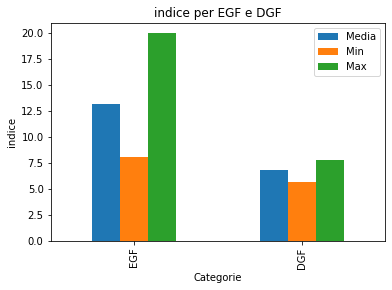

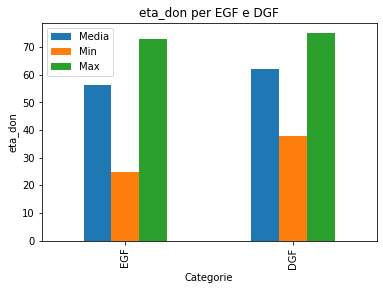

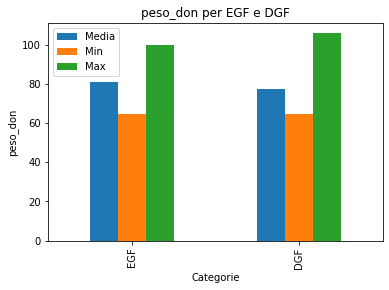

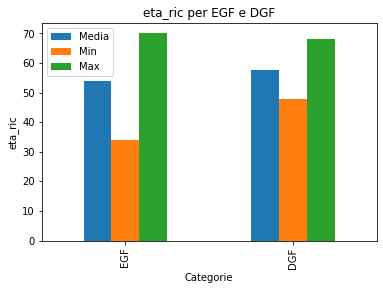

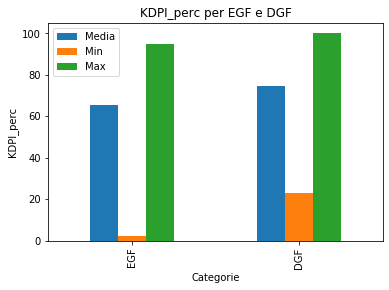

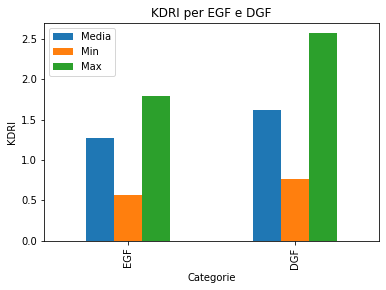

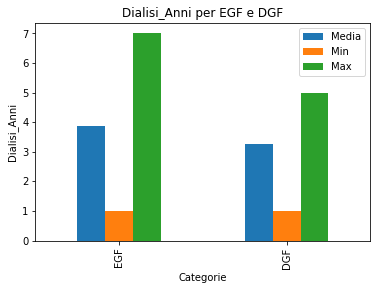

In [36]:
lista = ['indice', 'eta_don', 'peso_don', 'eta_ric', 'KDPI_perc', 'KDRI', 'Dialisi_Anni']
      
for i in lista:    	
    groups = [egf[i], dgf[i]]
    group_labels = ['EGF', 'DGF']

    df = pd.DataFrame(groups, index=group_labels).T

    pd.concat(
        [df.mean().rename('Media'), df.min().rename('Min'), 
         df.max().rename('Max')],
        axis=1).plot.bar()
    
    plt.title(i + ' per EGF e DGF')
    plt.xlabel('Categorie')
    plt.ylabel(i)

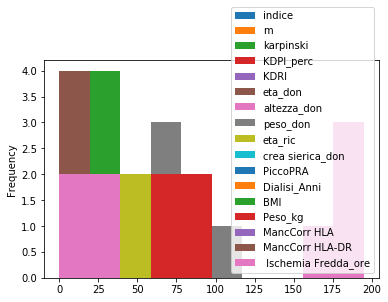

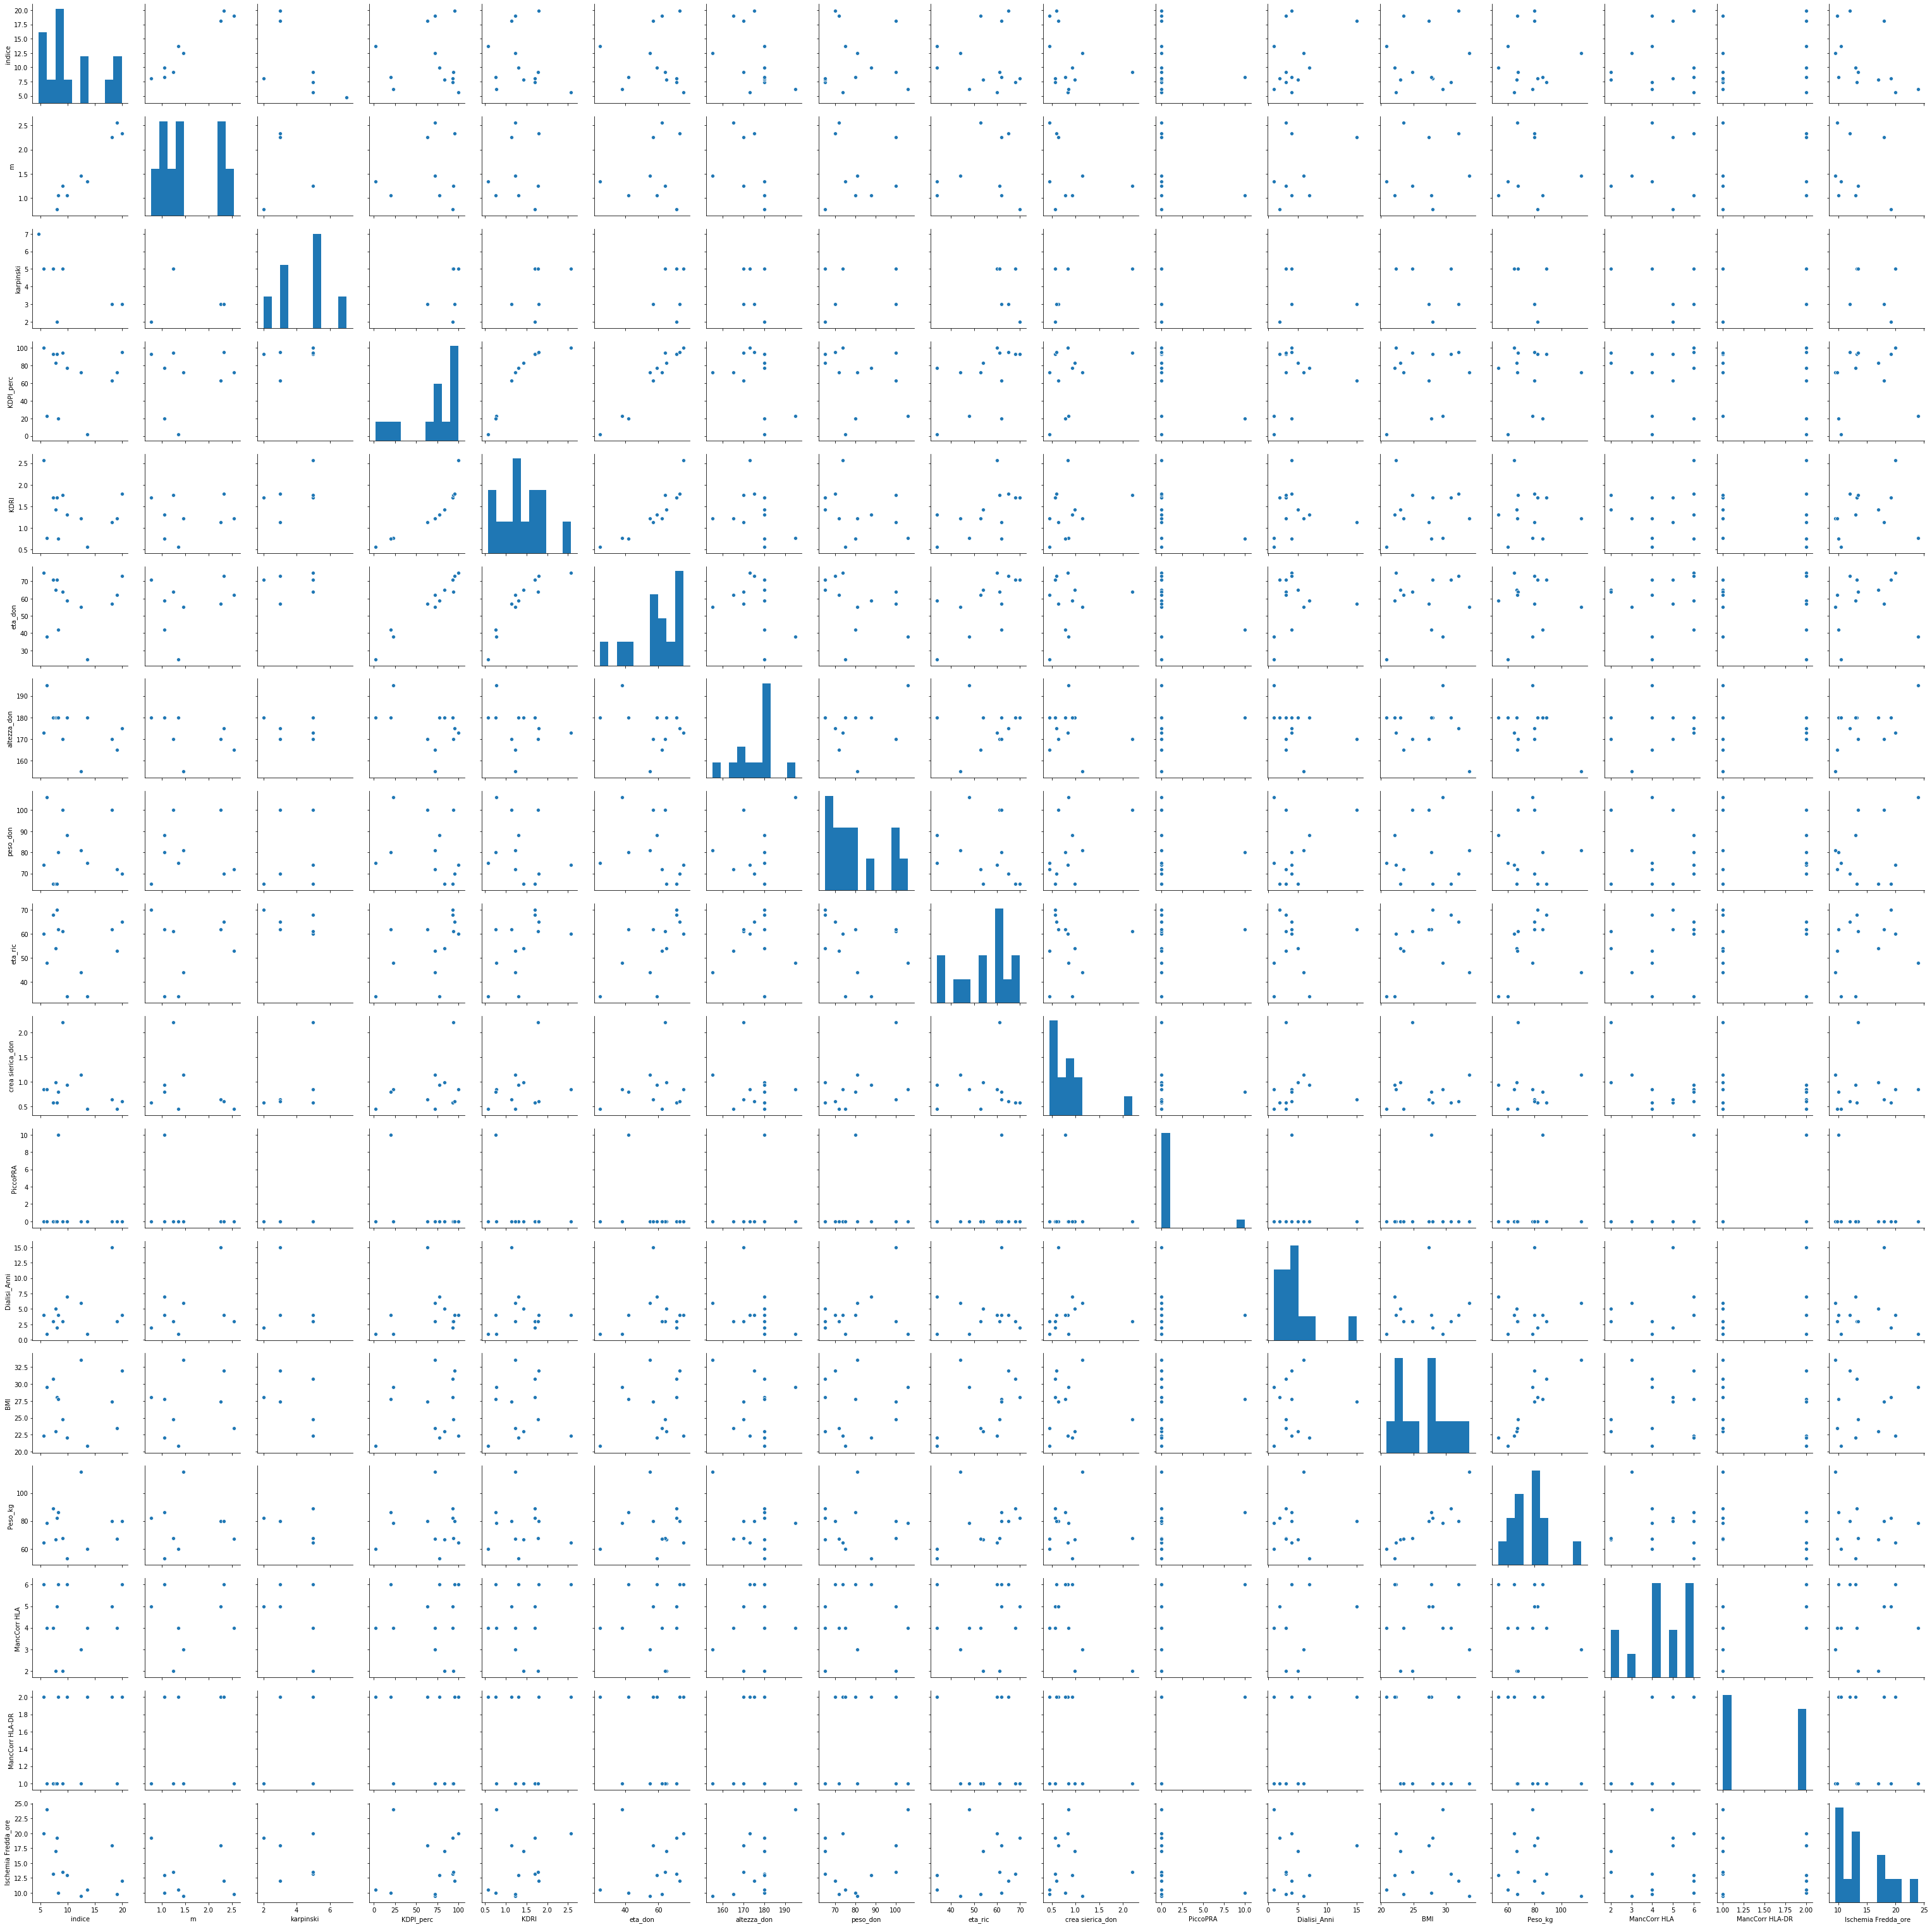

In [90]:
bx = dgf.plot.hist('eta_ric')
sns.pairplot(df.loc[:,df.dtypes == 'float64'])



## End Point 1
### Mann–Whitney *U* test
---


- Test non parametrico dell'ipotesi nulla 
- P Value < 0.005 ipotesi nulla rigettata

In [29]:
lista = ['indice', 'eta_don', 'peso_don', 'eta_ric', 'PiccoPRA', 'Dialisi_Anni', 'BMI', 'Peso_kg', 'eta_ric', 'MancCorr HLA-DR']          
for i in lista:    
    dgf_i = dgf[i]
    egf_i = egf[i]   
    u_statistic, pVal = stats.mannwhitneyu(dgf_i, egf_i)            
    print ('\nVariabile:', i ,'\nP value:', pVal, '\nU Statistic:', u_statistic, '\n-------------------------------' )


Variabile: indice 
P value: 0.0034637589886132533 
U Statistic: 0.0 
-------------------------------

Variabile: eta_don 
P value: 0.17693874692179512 
U Statistic: 11.5 
-------------------------------

Variabile: peso_don 
P value: 0.24221859728003842 
U Statistic: 13.0 
-------------------------------

Variabile: eta_ric 
P value: 0.4691667874841462 
U Statistic: 17.0 
-------------------------------

Variabile: PiccoPRA 
P value: 0.30853753872598694 
U Statistic: 16.0 
-------------------------------

Variabile: Dialisi_Anni 
P value: 0.347836162245574 
U Statistic: 15.0 
-------------------------------

Variabile: BMI 
P value: 0.46925144238923566 
U Statistic: 18.0 
-------------------------------

Variabile: Peso_kg 
P value: 0.40835692591565953 
U Statistic: 16.0 
-------------------------------

Variabile: eta_ric 
P value: 0.4691667874841462 
U Statistic: 17.0 
-------------------------------

Variabile: MancCorr HLA-DR 
P value: 0.1864992418067436 
U Statistic: 12.5 
------

## End Point 2
### Grafico Indice - m
___

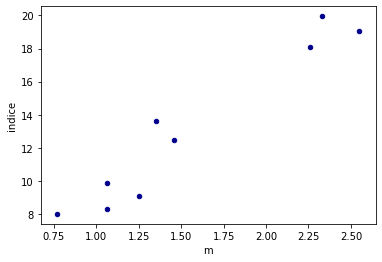

In [30]:
egf.plot.scatter(x='m'
                 , y='indice'
                 , c='DarkBlue')

### Spearman Test
#### Correlazione tra Indice del Verde e m

 - Test **non parametrico** che misura la correlazione tra variabile indipendente e variabile dipendente.
 - Valori ammessi da -1 a +1
 - +1 --> correlazione perfetta.
 - Se il valore della correlazione è positiva allora al crescere di una variabile crescerà anche la seconda. 
 

In [15]:
correlation, pVal = stats.spearmanr(egf['indice'], egf['m'])
print('\nRisultati Spearman', '\nCorrelazione:', correlation, '\nPValue:', pVal)


Risultati Spearman 
Correlazione: 0.9372466978064098 
PValue: 0.00019163134226574257


### Indice di correlazione di Pearson
#### Correlazione tra *Indice del Verde* e *m*

 - Indice che esprime il grado di correlazione **lineare** tra due variabili
 - Valori ammessi da -1 a +1
 - +1 --> perfetta correlazione lineare positiva.
 - -1 --> perfetta correlazione lineare negativa.
 - Se la correlazione è positiva allora al crescere di una variabile crescerà anche la seconda. 
 

In [17]:
correlation, pVal = stats.pearsonr(egf['indice'], egf['m'])
print('\nRisultati Spearman','\nCorrelazione:', correlation, '\nPValue:', pVal)


Risultati Spearman 
Correlazione: 0.9656147473967367 
PValue: 2.4001099157686744e-05
